# Seminar 1

## Numpy

Numpy - library for working with N-dimensional arrays

documentation - https://numpy.org/doc/

Why use numpy? Why not just Python `list`?

*   Convenience: numpy is designed for working with numerical arrays (python lists can contain anything)
*   Functionality: a great variety of functions, which are not available in pure Python. F. e. linear algebra, mathematical functions.
*   Better performance: the core of numpy is well-optimized C code, so it is much faster than Python.




### Example

We want to calculate matrix product of 2 matrices.

In [ ]:
#Some matrices
A = []
B = []
n = 300
for i in range(n):
  A.append(list(range(i, n+i)))
  B.append(list(range(i+9, n+i+9)))

In [ ]:
len(A), len(A[0])

Let's use pure Python and measure time:

In [ ]:
%%time

C = []
#rows of A
for i in range(len(A)):
   #columns if B
   res_i = []
   for j in range(len(B[0])):
       #elements of row/column
       res_i_j = 0
       for k in range(len(B)):
           res_i_j += A[i][k] * B[k][j]
       res_i.append(res_i_j)
   C.append(res_i)

It took $\sim 10$ seconds

Let's try numpy

In [ ]:
import numpy as np

#convert lists to arrays
A_ = np.array(A)
B_ = np.array(B)

In [ ]:
%%time
C_ = A_.dot(B_)

It took only $\sim 30$  milliseconds

In [ ]:
10_000 / 30

The numpy code was $\sim 333$ times faster. Also, we had to write only one line of code.

### Numpy basics

Usually, library is imported with the name `np`

In [ ]:
import numpy as np

Quoting [documentation](https://numpy.org/devdocs/user/quickstart.html):
> NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.

ndarray (n-dimensional array) can be created from python list

In [ ]:
l = [1,2,3]
a1 = np.array(l)
a1

In [ ]:
l = [[1,2,3], [2,4,6]]
a2 = np.array(l)
a2

In [ ]:
l = [[[1,2,3], [2,4,6]], [[10,20,30], [20,40,60]]]
a3 = np.array(l)
a3

It is possible to create 1D, 2D, 3D, ... arrays. The information about dimensions is saved:

In [ ]:
#we have 2 rows, 3 columns - stored in shape attribute
a2.shape

In [ ]:
#To check dimension 0
len(a2)

In [ ]:
#number of dimensions
a2.ndim

All elements have the same type

In [ ]:
a2.dtype

It is also possible to create arrays, filled with 0 or 1

In [ ]:
#only zeros in 2D matrix - 4 rows, 2 columns
np.zeros((4, 2))

In [ ]:
np.ones((2,4))

or with random numbers

In [ ]:
#rand - uniform [0, 1)
r = np.random.rand(3,5)
r

Random means we will get different results if we run the same code again. This may not always be good - the experiments may become irreproducible.

It is a good idea to fix the random - set `seed`:

In [ ]:
np.random.seed(0)

r = np.random.rand(3,5)

r

### Functions

Some basic functions for statistics:

In [ ]:
np.min(r), np.mean(r), np.max(r), np.sum(r)

Each function returns one number - minimum/average/maximum/sum of the array.

However, we often need to compute the statistic for every row/column. For example, rows represent students and columns - assignments. We want to find average grade for the assignment or the sum of grades for every student.

There is an optional argument, called `axis`:

In [ ]:
#average for every column
np.mean(r, axis=0)

In [ ]:
#Сsum for every row
np.sum(r, axis=1)

### Indexing

Rows:

In [ ]:
#Row with index 0
r[0]

In [ ]:
#Slice of rows
r[0:2]

In [ ]:
#Particular rows from list of indices
r[[1,0,0]]

Columns:

In [ ]:
#column with index 1
r[:,1]

In [ ]:
#slice
r[:,1:3]

In [ ]:
#Particular columns from list of indices
r[:,[1,0,0]]

Particular element:

In [ ]:
r[0,0], r[0][0]

Combinations:

In [ ]:
r[1:3, 2:4]

In [ ]:
r[[1, 0, 0], 2:4]

Important: we get access to the elements in the array, we can change them.

In [ ]:
r[[1, 0, 0], 2:4] = 0

r

It is also possible to use masks (bool arrays) to get to elements

In [ ]:
r

In [ ]:
#bool array (True - if element > 0.5)
r > 0.5

In [ ]:
#can choose the elements
r[r > 0.5]

Important: we get access here, too

In [ ]:
r[r > 0.5] = -0.5

r

### Arithmetic operations

Basic operations are elementwise:

In [ ]:
r + 1

In [ ]:
r * 2

In [ ]:
#we also can divide by zero, but we will get warning
r / 0

`nan` - not a number, this element can not be represented with number (0/0 is undefined)

`inf` - infinity, the number is too big for numpy

In [ ]:
np.nan -  np.nan

In [ ]:
np.inf - np.inf

In [ ]:
np.nan +  np.nan

Usually, `nan` is a bad thing to have in an array.

In [ ]:
np.sin(r)

In [ ]:
np.abs(r - 1.5)

The power will be elementwise, too

In [ ]:
r ** 2

It is also possible to work with several arrays

In [ ]:
np.random.seed(2024)

b = np.random.rand(3, 5)

In [ ]:
r + b

In [ ]:
r / b

The arrays should have the same shapes

In [ ]:
np.random.seed(2024)

k = np.random.rand(3,9)

#Error here
r + k

However, arrays can be broadcasted to have fitting shapes.

Two dimensions are compatible when:

*   they are equal, or
*   one of them is 1

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

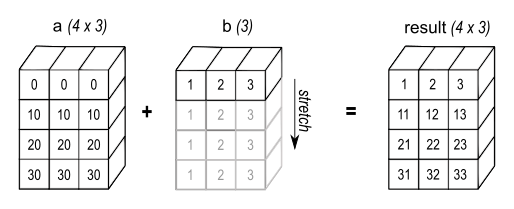

In [ ]:
d = np.random.rand(5)

r + d

Matrix product, dimensions should match:

In [ ]:
t = np.random.rand(5,4)

#2 ways, work the same
r @ t, r.dot(t)

In [ ]:
#error, dims do not match
t.dot(r)

### More useful things

In [ ]:
#transposing
r.T

Numbers generator, similar to `range`

In [ ]:
np.arange(0, 1, 0.2)

But range cannot have `float` step

In [ ]:
#error
range(0, 2, 0.02)

and returns generator, not array

In [ ]:
range(0, 20, 1)

### Tasks

1. Find minimal odd number in the array

In [ ]:
vec = np.array([1,4,5,2,4,-1,24,2,17])

#YOUR CODE

2. Replace all odd numbers with 42

In [ ]:
vec = np.array([1,4,5,2,4,-1,24,2,17])

#YOUR CODE

3. Create array of first `n` even numbers in descending order (like [10, 8, 6, 4, 2])

In [ ]:
n = 5

#YOUR CODE

### Conclusion

Numpy is a  library for fast and convenient work with arrays. If we can use numpy and avoid `for`-loops - we should do it.

## Matplotlib

Matplotlib is a basic library for visualization.

documentation for matplotlib.pyplot - https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

In [ ]:
import matplotlib.pyplot as plt

We can draw a basic plot

In [ ]:
x = np.arange(0, 10, 1)
y = x ** 4 + 5 * x ** 3

plt.plot(x, y)

### Customization

We can also add/change:



*   Color of the line
*   Markers
*   Several lines on one plot
*   Labels
*   Title
*   Axis labels
*   etc.



In [ ]:
plt.title('Some figure')
plt.plot(x, y,
         color='red', #color of the line
         linestyle='--', #style of the line (dashed)
         label=r'$x^4 + 5x^3$', #label of the line
         marker='*', #marker style (stars)
         mec='black', #edge color of the marker
         mfc='yellow', #inner color of the marker
         ms=20 #size of the marker
         )
plt.plot(x, x ** 4 + 5 * x, color='green', label=r'$x^4 + 5x$', marker='s', mec='blue', mfc='pink',  linestyle=':', ms=10)
plt.xlabel('The x')
plt.ylabel('The y')
plt.grid()
plt.legend()

plt.show()

### Types of plots

Some other types of plots:

In [ ]:
#Points
plt.scatter(x, y)

In [ ]:
#Each point has a color
c = np.random.randint(2, size=len(x))
plt.scatter(x, y, c=c)

In [ ]:
#histograms
t = np.random.normal(size=100_000)
plt.hist(t, bins=50)
plt.show()

In [ ]:
#barplots
x = ["APPLES", "BANANAS"]
y = [400, 350]
plt.bar(x, y)

In [ ]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels)
plt.show()

In [ ]:
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2)


plt.show()

### Subplots

It is also possible to create several plots near each other

In [ ]:
x1 = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x1**2)
x2 = np.linspace(-np.pi, np.pi, 500)
y2 = np.cos(x2**2)


fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].plot(x1, y1)
ax[1].plot(x2, y2)

In [ ]:
x1 = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x1**2)
x2 = np.linspace(-np.pi, np.pi, 500)
y2 = np.cos(x2**2)

#2 rows, 2 coluns
fig, ax = plt.subplots(ncols=2, nrows=2)
ax[0][0].plot(x1, y1)
ax[1][0].plot(x2, y2)

ax[0][1].scatter(x1, y1)
ax[1][1].scatter(x2, y2)

In [ ]:
x1 = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x1**2)
x2 = np.linspace(-np.pi, np.pi, 500)
y2 = np.cos(x2**2)

#Here we add sharex=True
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True)
fig.suptitle('4 plots')
ax[0][0].plot(x1, y1)
ax[0][0].set_title('sin, lineplot')
ax[0][0].set_xlabel('this is x')
ax[0][0].set_ylabel('this is y')

ax[1][0].plot(x2, y2)

ax[0][1].scatter(x1, y1)
ax[1][1].scatter(x2, y2)

### Conclusion

Matplotlib is a simple library for plots. Many other libraries are the extensions of it. Easy to use, but need to spend time to draw beautiful plots.

## Pandas

Pandas is a  library for working with tables (datasets)

Why use pandas:



*   Convenient table representation
*   A lot of functions for tables (as in Excel)
*   Visualization (embedded + some libraries are design for pandas DataFrames)




Documentation - https://pandas.pydata.org/docs/

Download `train.csv` file from https://www.kaggle.com/c/titanic/data?select=train.csv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Opening the dataset

Pandas can read many types of files, for example, `.csv`, `.tsv` and `.xlsx`.

In [ ]:
df = pd.read_csv('train.csv')

The table object in pandas is called `DataFrame`:

In [ ]:
type(df)

We can look on the first rows:

In [ ]:
df.head(4)

Bold numbers in first column are indices (like in lists and arrays), bold words in first row are column names.

In [ ]:
#Last rows
df.tail(4)

In [ ]:
#Random rows
df.sample(6)

What is this table? Information about passengers on the Titanic. Every row is a passenger.

We need to know, what every column contains:

*  **PassengerId** - The ID of the passenger
*   **Survived** - 	Survival of the passenger;	0 = No, 1 = Yes
* **Pclass**	- Ticket class;	1 = 1st, 2 = 2nd, 3 = 3rd
* **Sex**	- Sex of the passenger
*   **Age** -	Age in years
*   **SibSp**	- Number of siblings / spouses aboard the Titanic
* **Parch**	- Number of parents / children aboard the Titanic
* **Ticket**	- Ticket number
* **Fare**	- Passenger fare
* **Cabin**	- Cabin number
* **Embarked**	- Port of Embarkation;	C = Cherbourg, Q = Queenstown, S = Southampton

We can start by checking the basic information about the DataFrame

In [ ]:
#Types of columns
df.dtypes

In [ ]:
df.shape

In [ ]:
#number of rows
len(df)

In [ ]:
df.columns

### Indexing

We can choose columns

In [ ]:
df['Age']

The columns are `Series` - 1D array, with index labels.

In [ ]:
type(df['Age'])

Why index labels matter? Why are they bold in DataFrame and why are they preserved in Series?


Because they are ids of rows/elements and they are not always numbers 0, 1, ...


Let's firstly look on how to choose rows: methods `loc` and `iloc`

In [ ]:
#choose row with index = 1
df.loc[1]

In [ ]:
#choose row, which relative position is 1
df.iloc[1]

No difference? Let's check the following example:

In [ ]:
np.random.seed(0)
sample = df.sample(3)

sample

The relative position 1 is occupied by Edward (648 index)

In [ ]:
sample.iloc[1]

But there is no index 1, so `loc` will give an error:

In [ ]:
#error
sample.loc[1]

When we take the column of our sample, the indices are perserved.

In [ ]:
sample['Age']

It is possible to use masks for choosing rows (like in numpy)

In [ ]:
#Passengers who paid more than 300
df[df['Fare'] > 300]

In [ ]:
#Women who paid more than 300
df[(df['Fare'] > 300) & (df['Sex'] == 'female')]

### Some statistics

In [ ]:
df.describe()

In [ ]:
#Correlation
df.corr(numeric_only=True)

It may be important to look into unique values (often categories) of columns.

It is said that there are 3 classes. Is this true?

In [ ]:
df['Pclass'].unique()

In [ ]:
df['Pclass'].nunique()

In [ ]:
#Count how many passengers were in every class
df['Pclass'].value_counts()

We may assume that people in class 1 paid on average more than people in class 3.

Let's check it:

In [ ]:
df.groupby('Pclass')['Fare'].mean()

`groupby` - method chooses rows with same value (1, 2 or 3) of the column (`'Pclass'`) and computes the  function (`mean`) for every same value.

**Task:**

What was the maximum age of male/female passengers?

In [ ]:
#YOUR CODE

### Add/delete columns

In [ ]:
df['Random'] = np.random.rand(len(df))
df.sample(2)

There was no `'Random'` column, we have created it (like in python `dict`, just added a new key)

We also can use old columns to create new

In [ ]:
df['Fare'] * 2

In [ ]:
df['Double_Fare'] =  df['Fare'] * 2
df.sample(2)

In [ ]:
df['Fare_Random'] =  df['Fare'] + df['Random']
df.sample(2)

In [ ]:
df['Big_Fare'] =  (df['Fare'] > 100).astype('int64')
df.sample(2)

All the new columns were created using math or bool operations. What if we have some more complex function?

For example, we want to have column 'name_length'

In [ ]:
len(df['Name'])

The code does not compute `len` for every name, but for the Series itself.

To apply function we can use `apply` (or `for`-loop, but it is slow)

In [ ]:
df['Name'].apply(len)

**Task:**

Every full name contains a title, let's extract it and put into new column.

In [ ]:
def extract_title(s):
  #YOUR CODE


df['Title'] = df['Name'].apply(extract_title)

df.sample(5)

To delete columns/rows we can use `drop` function

In [ ]:
df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])

In [ ]:
df.sample(3)

But the columns are still there ...

Important: many functions that change the DataFrame are not inplace, they return a **copy**

In [ ]:
new_df = df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])
#change something in new_df
new_df['Age'] = 0
new_df['Parch'] = -12321
new_df.head(2)

In [ ]:
#initial is untouched
df.head(2)

We need to save the changes (use `inplace=True` or `df = df.drop(...)`)

In [ ]:
#df = df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])
df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'], inplace=True)
df.sample(2)

## Seaborn

Seaborn is a library for visualization, extension of matplotlib

Why use seaborn:



*   Simplier syntax
*   Faster and easier to make beautiful plots (the default versions are alredy ok)
*   Convenient for pandas
*   More complex plots



In [ ]:
import seaborn as sns

### Types of plots

In [ ]:
#The histogram
sns.histplot(data=df, x='Age')

In [ ]:
sns.histplot(data=df,
             x='Age',
             hue='Pclass' #different color, bars
             )

If we want to make a similar plot with matplotlib:

In [ ]:
plt.title("Age")
plt.hist(
    [df["Age"][df["Pclass"] == 1],
     df["Age"][df["Pclass"] == 2],
     df["Age"][df["Pclass"] == 3]],
    stacked=True,
    bins=50
);


In [ ]:
sns.scatterplot(df,
                x='Age',
                y='Fare'
                )

In [ ]:
#boxplot
sns.catplot(df, x="Pclass", y="Age",  kind="box")

**Task**

Draw boxplot, where color is Sex, every box is a port of embarkation and the values are the fare.

In [ ]:
#YOUR CODE

###Conclusion

Seaborn is a library for drawing beautiful plots easily.